In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("data/data_moods.csv")
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [4]:
df.shape

(42305, 22)

In [35]:
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,686.0,41.534985,23.045707,0.000000,30.000000,47.00000,57.000000,88.000
length,686.0,221791.485423,63399.058492,76773.000000,179114.500000,213273.00000,254569.750000,518373.000
danceability,686.0,0.500553,0.158955,0.078900,0.388000,0.50500,0.612000,0.941
acousticness,686.0,0.449749,0.410729,0.000005,0.014825,0.35900,0.905750,0.996
energy,686.0,0.507693,0.326490,0.001290,0.202000,0.49550,0.844000,0.994
instrumentalness,686.0,0.349610,0.410517,0.000000,0.000034,0.02635,0.858250,0.966
liveness,686.0,0.166867,0.142128,0.031800,0.092500,0.11100,0.173750,0.963
valence,686.0,0.342438,0.252304,0.035300,0.131250,0.28200,0.508750,0.977
loudness,686.0,-11.531020,7.468629,-42.018000,-15.858750,-9.35800,-5.634500,1.342
speechiness,686.0,0.053946,0.041374,0.023200,0.033200,0.04070,0.057375,0.416


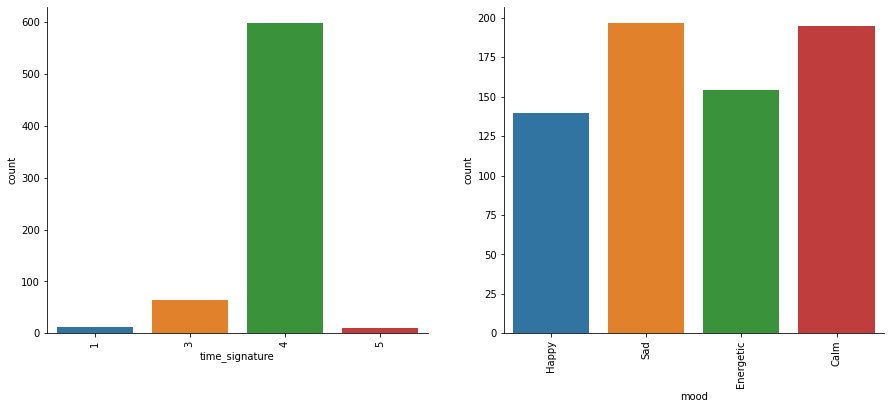

In [36]:
categorical_cols = ['time_signature', 'mood']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)

plt.show()

In [37]:
numerical_cols = df.select_dtypes('number').drop('time_signature', 1).columns.to_list()

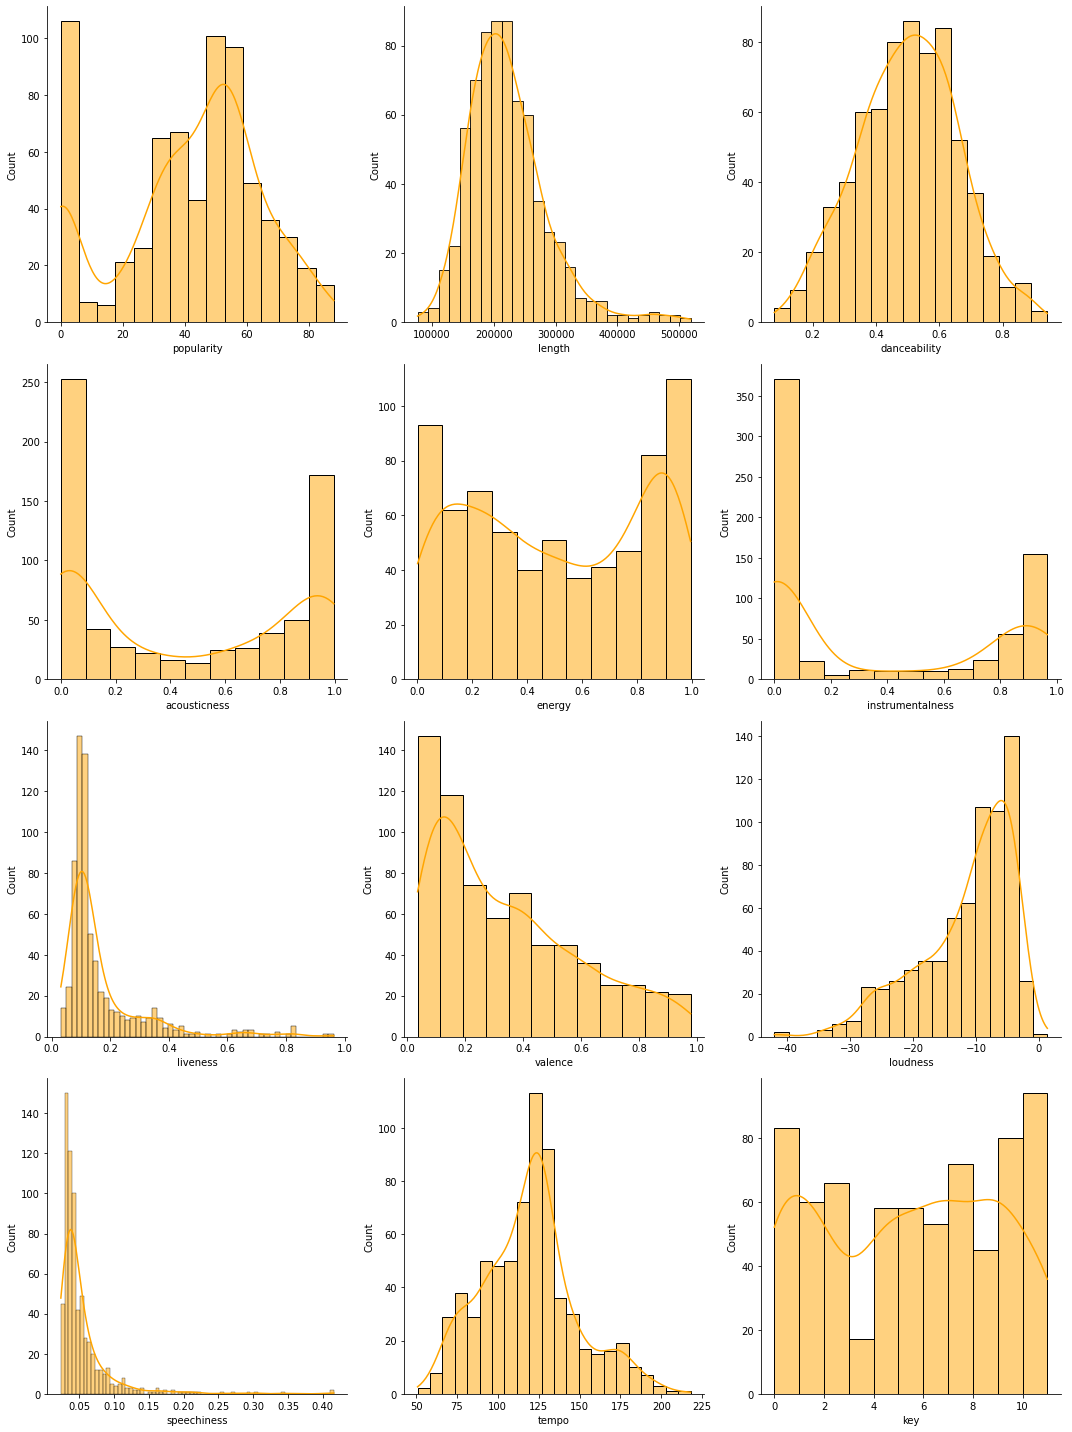

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, fill=True, color='orange')

plt.tight_layout()
plt.show()

In [39]:
def plot_genre_horizontal_bar(col, title=None):
    data = df.groupby('mood')[col].mean().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    data.plot.barh(color=colors)
    plt.xlabel(col)
    plt.title(title, fontdict={'size': 18, 'color': '#de5d83'})
    plt.show()

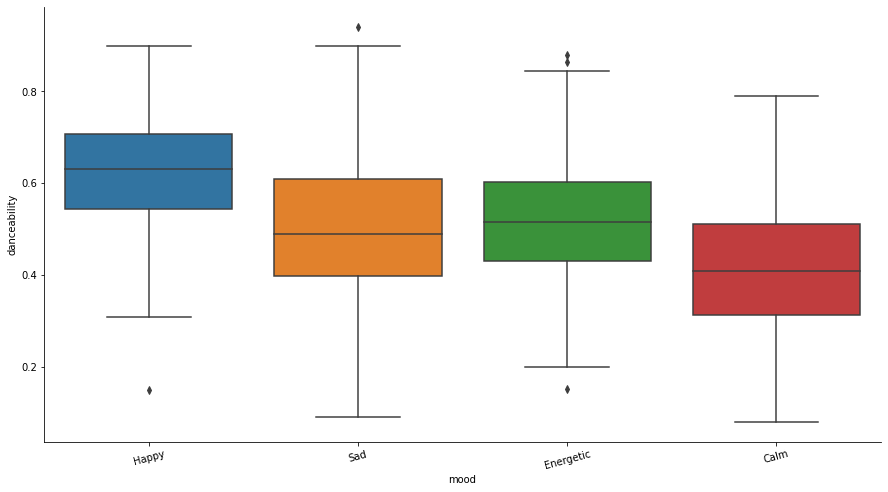

In [40]:
sns.boxplot(data=df, x='mood', y='danceability')
plt.xticks(rotation=15)
plt.show()

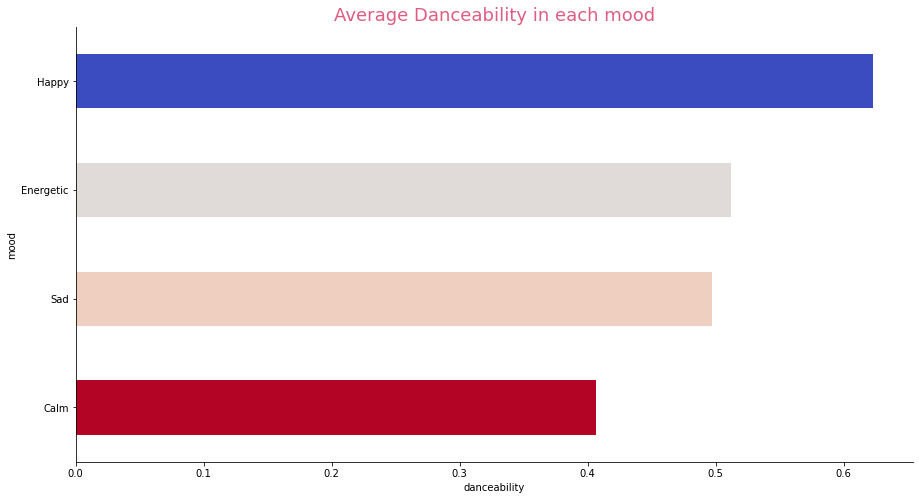

In [41]:
plot_genre_horizontal_bar('danceability',
                          title="Average Danceability in each mood")

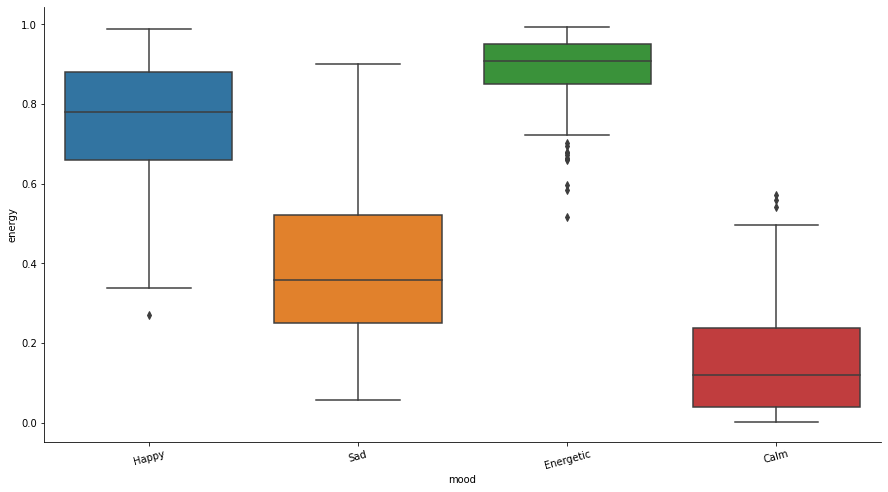

In [42]:
sns.boxplot(data=df, x='mood', y='energy')
plt.xticks(rotation=15)
plt.show()

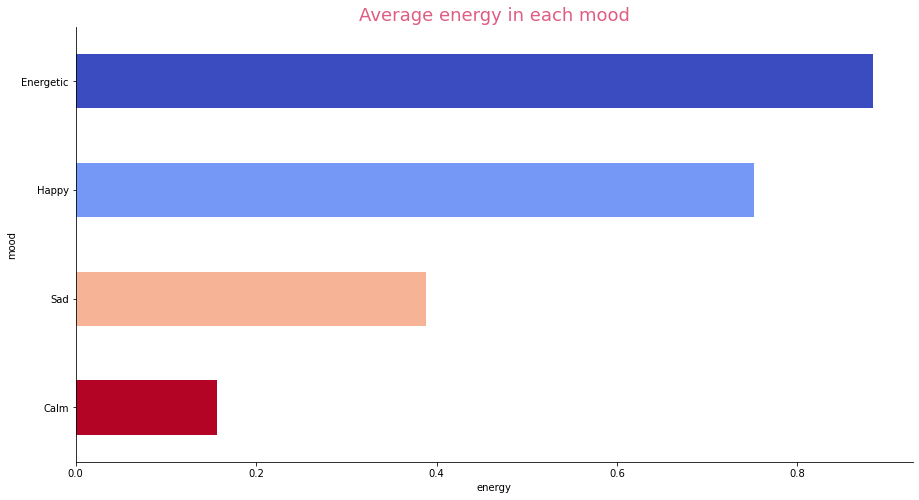

In [44]:
plot_genre_horizontal_bar('energy', title="Average energy in each mood")

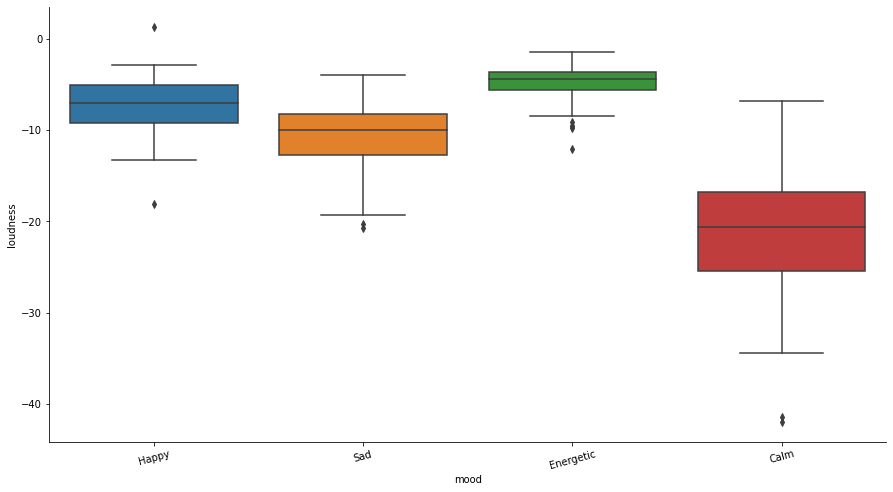

In [45]:
sns.boxplot(data=df, x='mood', y='loudness')
plt.xticks(rotation=15)
plt.show()

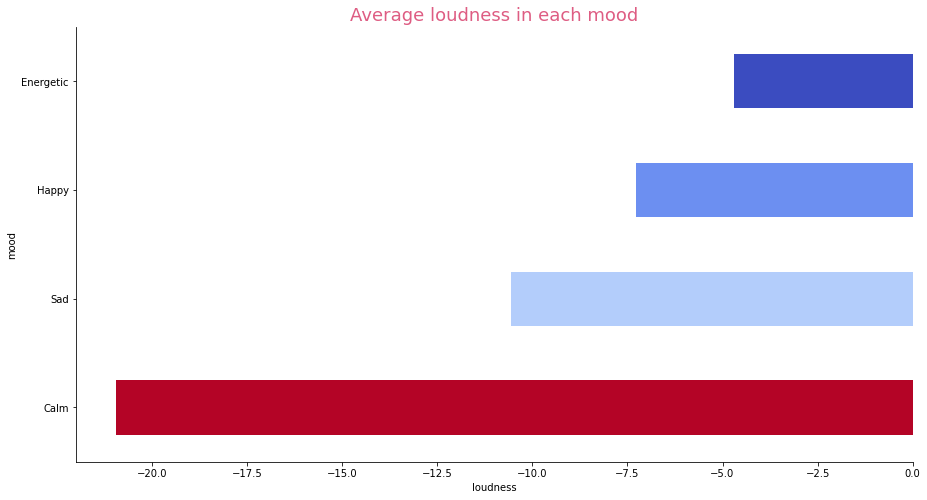

In [46]:
plot_genre_horizontal_bar('loudness', title="Average loudness in each mood")

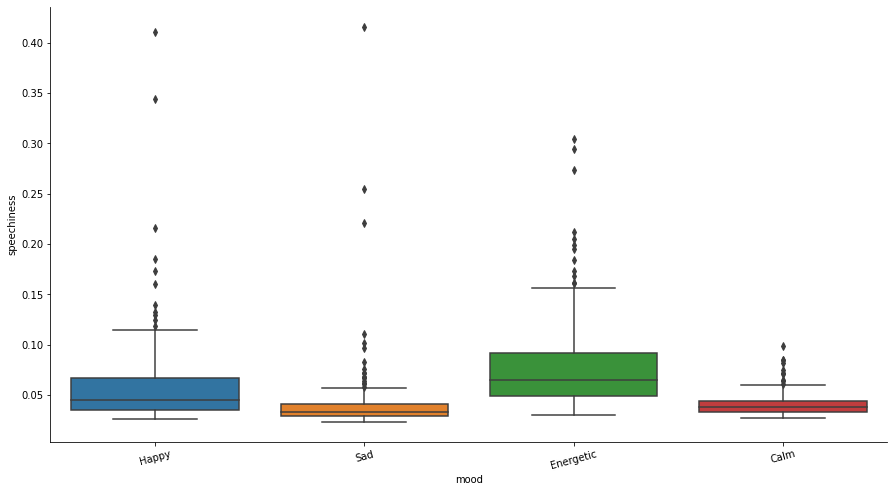

In [47]:
sns.boxplot(data=df, x='mood', y='speechiness')
plt.xticks(rotation=15)
plt.show()

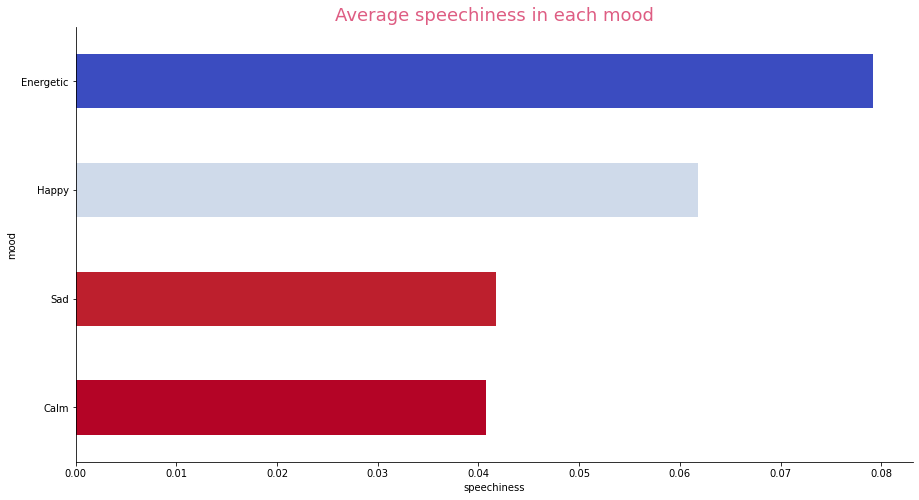

In [48]:
plot_genre_horizontal_bar('speechiness',
                          title='Average speechiness in each mood')

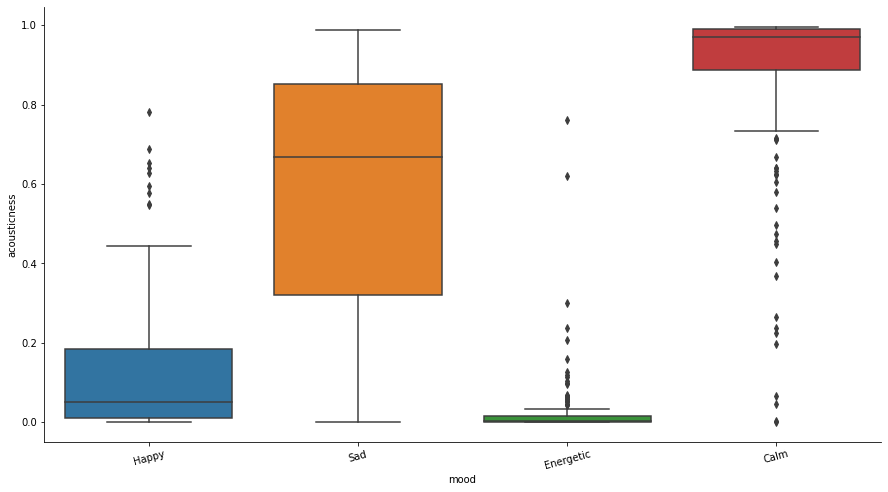

In [49]:
sns.boxplot(data=df, x='mood', y='acousticness')
plt.xticks(rotation=15)
plt.show()

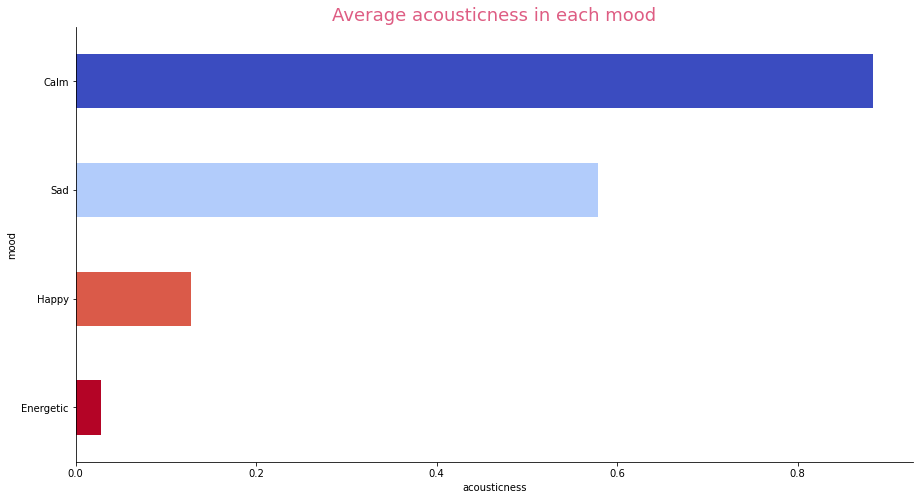

In [50]:
plot_genre_horizontal_bar('acousticness',
                          title='Average acousticness in each mood')

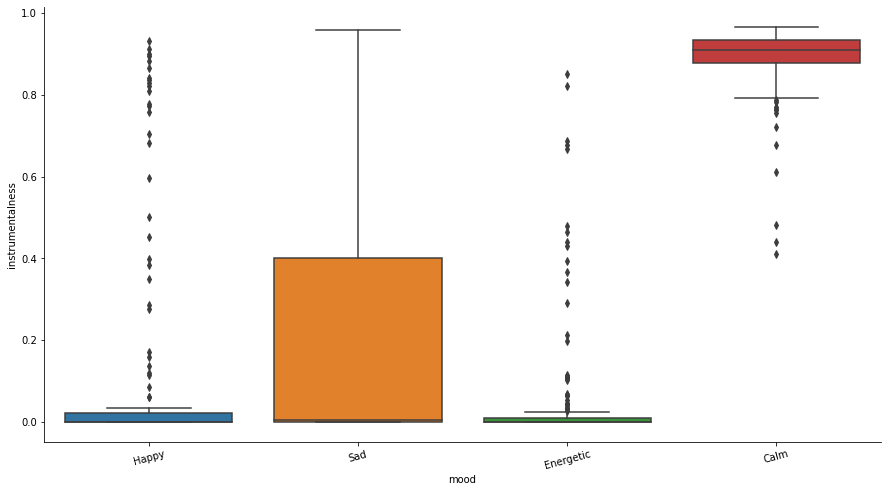

In [51]:
sns.boxplot(data=df, x='mood', y='instrumentalness')
plt.xticks(rotation=15)
plt.show()

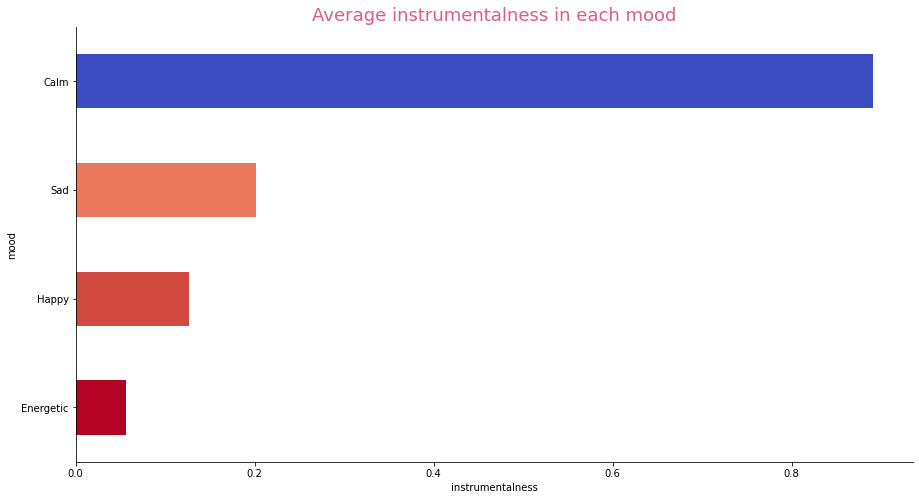

In [52]:
plot_genre_horizontal_bar('instrumentalness',
                          title='Average instrumentalness in each mood')

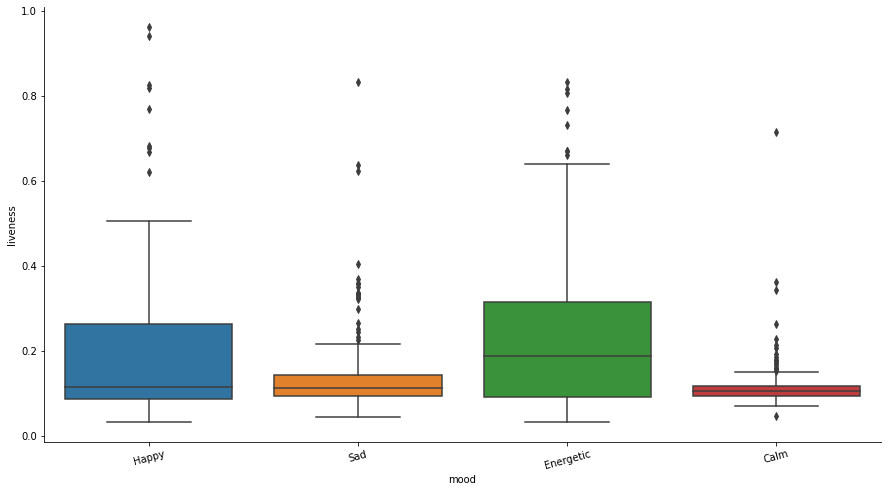

In [53]:
sns.boxplot(data=df, x='mood', y='liveness')
plt.xticks(rotation=15)
plt.show()

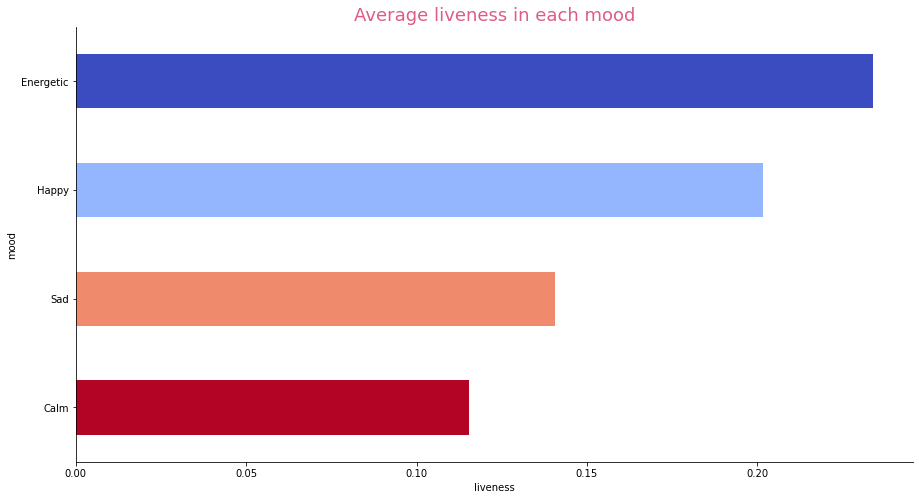

In [54]:
plot_genre_horizontal_bar('liveness', title='Average liveness in each mood')


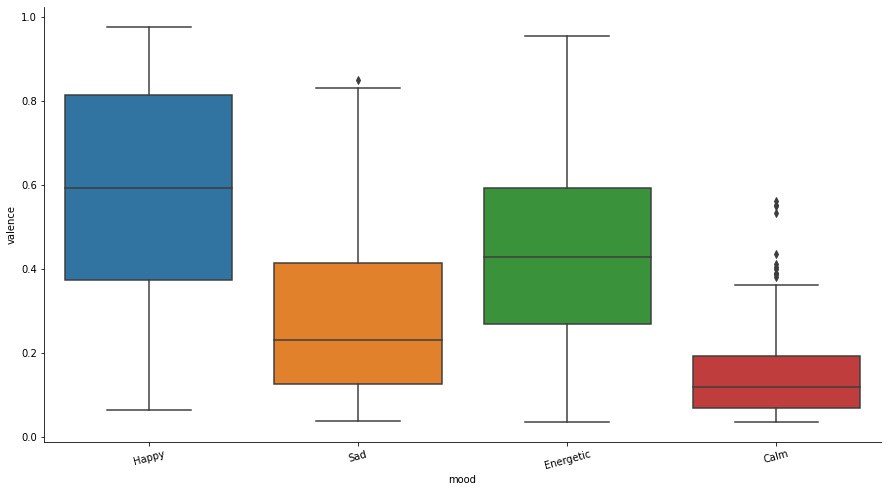

In [55]:
sns.boxplot(data=df, x='mood', y='valence')
plt.xticks(rotation=15)
plt.show()

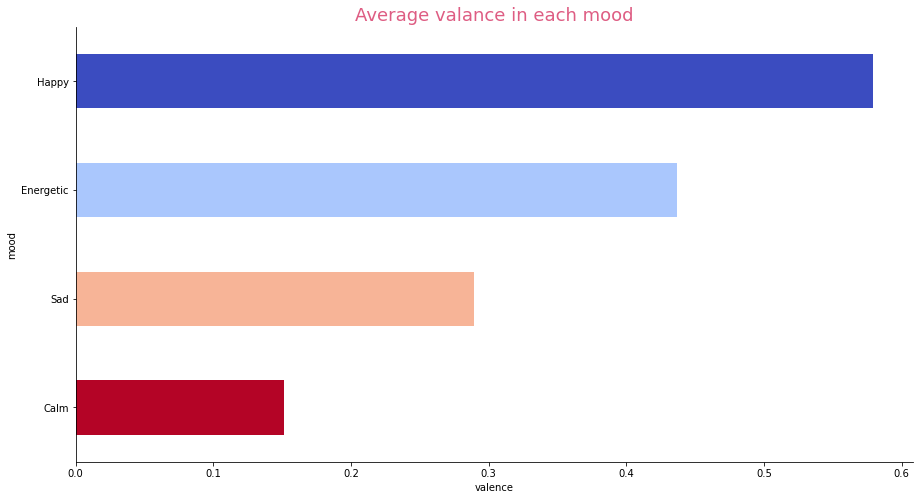

In [56]:
plot_genre_horizontal_bar('valence', title='Average valance in each mood')

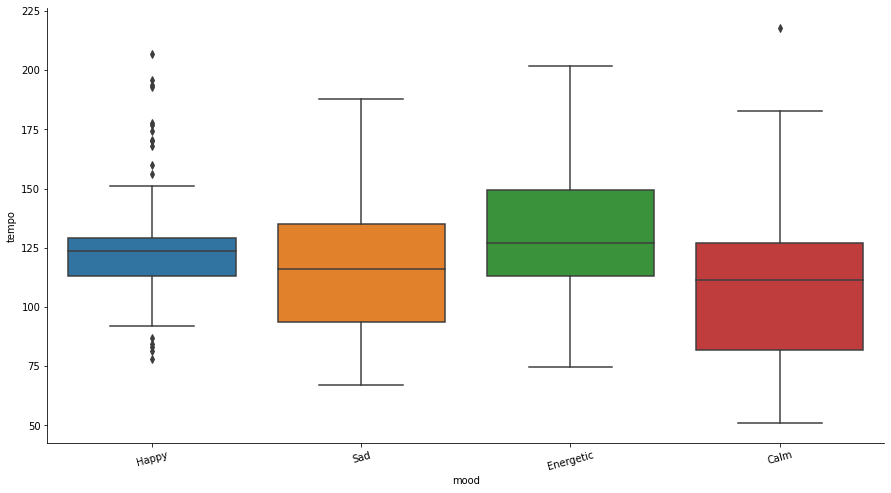

In [57]:
sns.boxplot(data=df, x='mood', y='tempo')
plt.xticks(rotation=15)
plt.show()

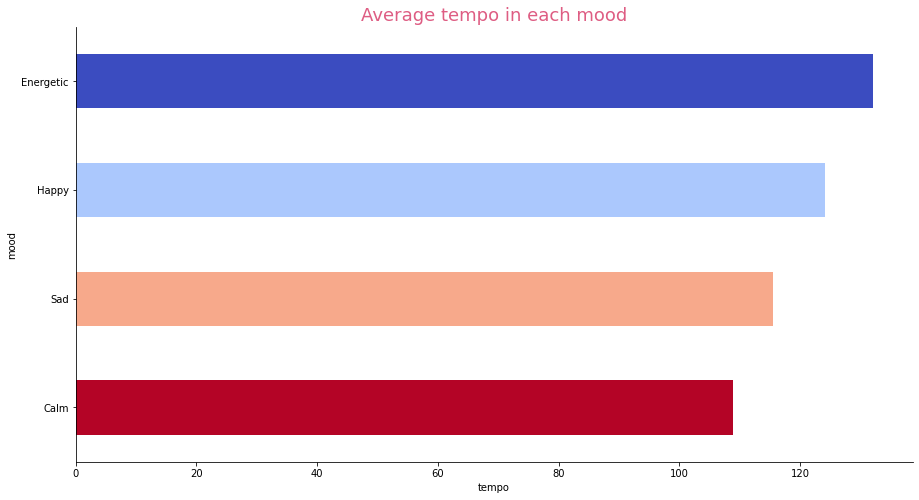

In [58]:
plot_genre_horizontal_bar('tempo', title='Average tempo in each mood')

In [61]:
data = (df
        .groupby(['mood', 'time_signature'])['time_signature']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

time_signature,1,3,4,5
mood,,,,
Calm,9.000000,28.000000,150.000000,8.000000
Energetic,nan,4.000000,150.000000,nan
Happy,1.000000,2.000000,137.000000,nan
Sad,2.000000,30.000000,162.000000,3.000000


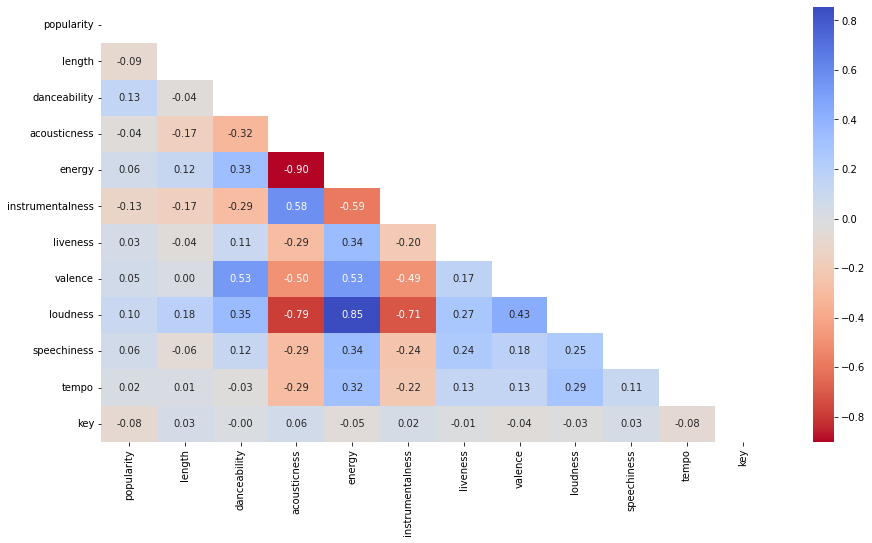

In [62]:
corr_mat = df[numerical_cols].corr()

sns.heatmap(corr_mat,
            annot=True,
            fmt='.2f',
            cmap=plt.cm.coolwarm_r,
            mask=np.triu(corr_mat, k=0))
plt.show()